In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd 
import scipy as sp 
import scipy.stats as stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

plt.rc('font', family='Malgun Gothic')

In [2]:
data = pd.read_csv('서울날씨.csv')
data1 = pd.read_csv('천안날씨.csv')
data2 = pd.read_csv('의정부날씨.csv')
data3 = pd.read_csv('busanweather.csv')
data4 = pd.read_csv('천안날씨.csv')

df = pd.read_csv('ssg강남target.csv',encoding='cp949')

In [3]:
print(data)

      day  avgtemp  hightemp  avgrain  avgwind  avghum
0   43467     -4.9       0.2      106      1.7    42.8
1   43468     -3.5       3.2       98      1.4    38.8
2   43469     -1.1       4.1      131      1.2    55.5
3   43470     -2.8       1.1      109      2.2    40.3
4   43471     -2.8       2.7       78      1.2    35.0
..    ...      ...       ...      ...      ...     ...
77  43547      3.3       8.2       64      2.4    46.9
78  43548      4.3       9.7       42      2.3    45.4
79  43549      7.3      11.5        0      2.0    56.1
80  43550     11.4      17.6        0      2.0    51.1
81  43551     11.6      16.2        0      3.0    66.4

[82 rows x 6 columns]


In [81]:
ㅣ=['day','클래식 본','클래식 Mini 본','종이 쇼핑백','Mini 초코본','카라멜 피칸 Mini 본','카라멜 피칸 본','버라이어티(4개)','클래식바이츠(4개)','바이츠팩(버라이어티)','(3)더블피칸미니팩']
X = pd.DataFrame(data1, columns=['day','avgtemp','hightemp','avgrain','avgwind','avghum'])
Y = pd.DataFrame(df, columns=['핑크본'])
#a = pd.DataFrame(df, columns=['MC4 클래식 미니팩'])
#b = pd.DataFrame(df, columns=['베리 버라이어티 팩'])
#c = pd.DataFrame(df, columns=['핑크 버라이어티 팩'])
#d = pd.DataFrame(df, columns=['베리 본'])
#e = pd.DataFrame(df, columns=['핑크본'])
X=X.fillna(0)
Y=Y.fillna(0)
#a=a.fillna(0)
#b=b.fillna(0)
#c=c.fillna(0)
#d=d.fillna(0)
#e=e.fillna(0)

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   day       86 non-null     int64  
 1   avgtemp   86 non-null     float64
 2   hightemp  86 non-null     float64
 3   avgrain   86 non-null     float64
 4   avgwind   86 non-null     float64
 5   avghum    86 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 4.2 KB


In [83]:
Y

,핑크본
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
81,2.0
82,0.0
83,0.0
84,0.0


In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2021)

In [85]:
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train, axis=1)
model_trained= model.fit()

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


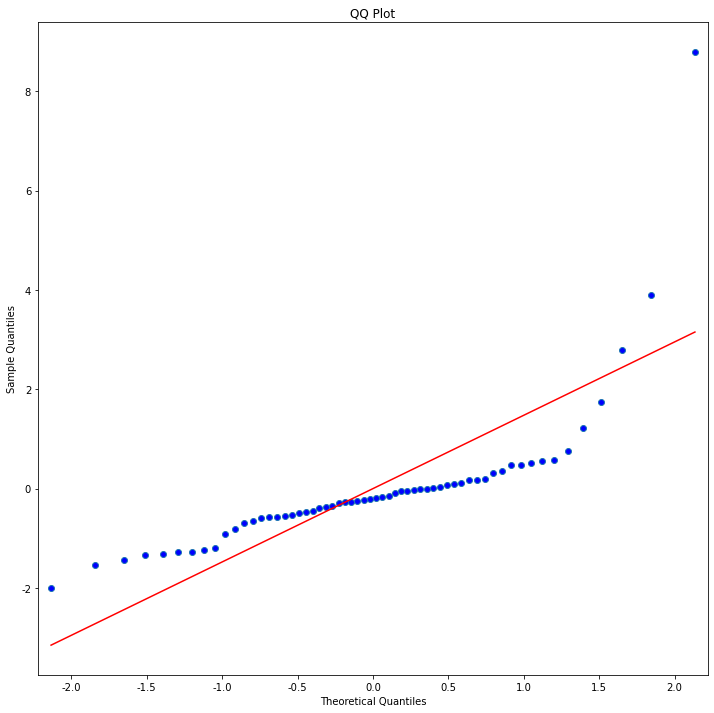

In [86]:
#확률오차의 정규성 확인
model_residuals = model_trained.resid
plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(1,1)
fig.set_figheight(12)
fig.set_figwidth(12)

sm.ProbPlot(model_residuals).qqplot(line='s', color='#1f77b4', ax=ax)
ax.title.set_text('QQ Plot')


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fitted values'), Text(0, 0.5, 'Residuals')]

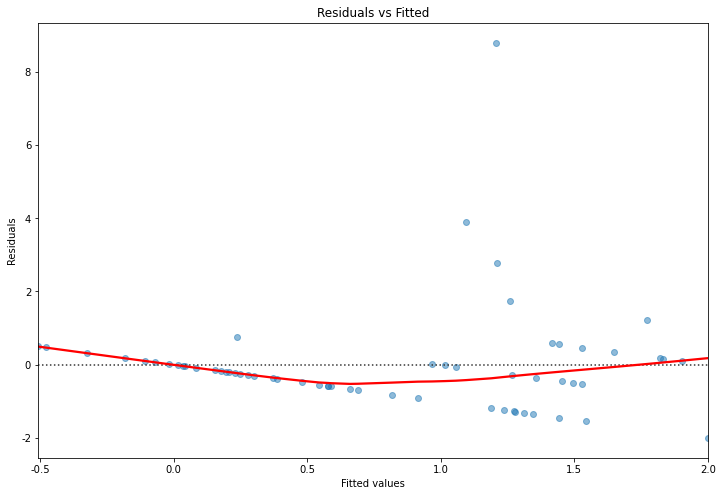

In [87]:
#확률오차의 등분산성 확인 
model_fitted_y= model_trained.fittedvalues 

fig, ax = plt.subplots(1,1)
fig.set_figheight(8)
fig.set_figwidth(12)

sns.residplot(model_fitted_y, Y_train, data=X_train, lowess=True, scatter_kws={'alpha': 0.5},
              line_kws={'color':'red'}, ax=ax)
ax.title.set_text('Residuals vs Fitted')
ax.set(xlabel='Fitted values', ylabel='Residuals')


In [88]:
#4.2 설명: 통계적으로 해석하기 
print(model_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                    핑크본   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.798
Date:                Fri, 22 Oct 2021   Prob (F-statistic):              0.117
Time:                        16:40:06   Log-Likelihood:                -108.55
No. Observations:                  60   AIC:                             231.1
Df Residuals:                      53   BIC:                             245.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1630.2189    661.708     -2.464      0.0

In [89]:

#p-value가 높은 값 제거 
model = sm.OLS(Y_train, X_train.drop(['avgtemp','hightemp','avgrain'], axis=1))
model_trained = model.fit()
print(model_trained.summary())


                            OLS Regression Results                            
Dep. Variable:                    핑크본   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     3.529
Date:                Fri, 22 Oct 2021   Prob (F-statistic):             0.0205
Time:                        16:41:06   Log-Likelihood:                -108.91
No. Observations:                  60   AIC:                             225.8
Df Residuals:                      56   BIC:                             234.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1232.8390    400.992     -3.074      0.0

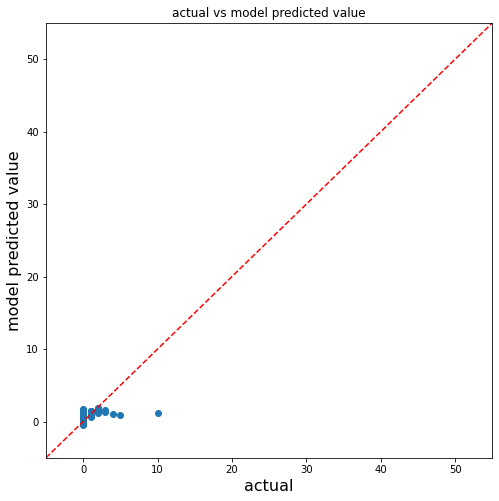

In [90]:
#4.3 예측: 미래의 반응변수 값 예측하기 
y_train_pred = model_trained.fittedvalues 

plt.figure(figsize=(8,8))
plt.title('actual vs model predicted value')
plt.scatter(Y_train, y_train_pred)
plt.plot([-5, 55], [-5, 55], ls="--", c='red')
plt.xlabel('actual', size=16)
plt.ylabel('model predicted value', size=16)
plt.xlim(-5, 55)
plt.ylim(-5, 55)
plt.show()

In [91]:
X_test = sm.add_constant(X_test)

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
y_test_pred = model_trained.predict(X_test.drop(['avgtemp','hightemp','avgrain'], axis=1))
y_test_pred.head()

34    0.421808
75    1.689918
69    1.947260
68    1.555548
8    -0.019603
dtype: float64

In [93]:
#Mean Squared Error
print(mean_squared_error(Y_test, y_test_pred))

3.7976672436015373


In [94]:
#제곱근 평균 제곱 오차
print(np.sqrt(mean_squared_error(Y_test, y_test_pred)))

1.948760437714584


In [95]:
#평균 절대 오차 
print(mean_absolute_error(Y_test, y_test_pred))

1.2247734876016025


In [96]:
#평균 절대 백분율 오차 
def mean_absolute_percentage_error(Y_true, Y_pred):
  Y_true, Y_pred = np.array(Y_true), np.array(Y_pred)
  return np.mean(np.abs((Y_true-Y_pred)/Y_true))*100

print(mean_absolute_percentage_error(Y_test, y_test_pred))

inf


/var/folders/bq/fx32wzws4hl9rlwvtlhf8zf00000gn/T/ipykernel_2602/2655571631.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((Y_true-Y_pred)/Y_true))*100


In [97]:
#결정계수 
print(r2_score(Y_test, y_test_pred))

-0.02812297023413657


In [98]:
#최종 결과정리 
print('Training MSE: {:.3f}'.format(mean_squared_error(Y_train, y_train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_train, y_train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(Y_train, y_train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(Y_train, y_train_pred)))
print('Training R2: {:.3f}'.format(r2_score(Y_train, y_train_pred)))

Training MSE: 2.209
Training RMSE: 1.486
Training MAE: 0.781
Training MAPE: inf
Training R2: 0.159


/var/folders/bq/fx32wzws4hl9rlwvtlhf8zf00000gn/T/ipykernel_2602/2655571631.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((Y_true-Y_pred)/Y_true))*100


In [99]:
print('Test MSE: {:.3f}'.format(mean_squared_error(Y_test, y_test_pred)))
print('Test RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(Y_test, y_test_pred))))
print('Test MAE: {:.3f}'.format(mean_absolute_error(Y_test, y_test_pred)))
print('Test MAPE: {:.3f}'.format(mean_absolute_percentage_error(Y_test, y_test_pred)))
print('Test R2: {:.3f}'.format(r2_score(Y_test, y_test_pred)))

Test MSE: 3.798
Test RMSE: 1.949
Test MAE: 1.225
Test MAPE: inf
Test R2: -0.028


/var/folders/bq/fx32wzws4hl9rlwvtlhf8zf00000gn/T/ipykernel_2602/2655571631.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((Y_true-Y_pred)/Y_true))*100


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [ ]:
lr_skl = LinearRegression(fit_intercept=False)
lr_skl.fit(X_train, Y_train)
y_pred_skl = lr_skl.predict(X_test)

lr_stat = sm.OLS(Y_train, X_train).fit()
y_pred_stat = lr_stat.predict(X_test)

In [ ]:
#StatModels 결과 
test_mse_stat = mean_squared_error(Y_test, y_pred_stat)
test_rmse_stat = np.sqrt(mean_squared_error(Y_test, y_pred_stat))
test_mae_stat = mean_absolute_error(Y_test, y_pred_stat)
test_mape_stat = mean_absolute_percentage_error(Y_test, y_pred_stat)
test_r2_stat = r2_score(Y_test, y_pred_stat)

print('Testing MSE: {:.3f}'.format(test_mse_stat))
print('Testing RMSE: {:.3f}'.format(test_rmse_stat))
print('Testing MAE: {:.3f}'.format(test_mae_stat))
print('Testing MAPE: {:.3f}'.format(test_mape_stat))
print('Testing R2: {:.3f}'.format(test_r2_stat))

In [ ]:
#Sklearn 결과
test_mse_skl = mean_squared_error(Y_test, y_pred_skl)
test_rmse_skl = np.sqrt(mean_squared_error(Y_test, y_pred_skl))
test_mae_skl = mean_absolute_error(Y_test, y_pred_skl)
test_mape_skl = mean_absolute_percentage_error(Y_test, y_pred_skl)
test_r2_skl = r2_score(Y_test, y_pred_skl)

print('Testing MSE: {:.3f}'.format(test_mse_skl))
print('Testing RMSE: {:.3f}'.format(test_rmse_skl))
print('Testing MAE: {:.3f}'.format(test_mae_skl))
print('Testing MAPE: {:.3f}'.format(test_mape_skl))
print('Testing R2: {:.3f}'.format(test_r2_skl))

In [ ]:
'''
import pandas as pd 
import csv

lr_data=pd.DataFrame(y_test_pred)

lr_data


#lr_data.to_csv('lrseoulforestprofit.csv', index=False)
'''